<a href="https://colab.research.google.com/github/georgezoto/TensorFlow-in-Practice/blob/master/C3W4_1_Shakespeare_Tokenizer_Embedding_LSTM_Dropouts_Regularizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
from tensorflow.keras import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [0]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt

--2020-04-24 16:54:47--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.14.112, 2607:f8b0:4007:802::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.14.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-04-24 16:54:47 (152 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [0]:
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")
print(corpus[:3])

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

['from fairest creatures we desire increase,', "that thereby beauty's rose might never die,", 'but as the riper should by time decease,']


In [0]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
  #print([line])
  #print(tokenizer.texts_to_sequences([line]))
  #print(tokenizer.texts_to_sequences([line])[0])
  #break
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

In [0]:
#https://keras.io/api/utils/python_utils/#to_categorical-function
label = ku.to_categorical(label, num_classes=total_words)

In [0]:
label[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [0]:
len(label[0])

3211

In [0]:
total_words

3211

In [0]:
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))

my_optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=my_optimizer, metrics=['accuracy'])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 10, 300)           301200    
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_4 (Dense)              (None, 1605)              162105    
_________________________________________________________________
dense_5 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
____________________________________________

In [0]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 6s 12ms/step - loss: 5.6682 - accuracy: 0.0564
Epoch 2/100
484/484 [==============================] - 6s 12ms/step - loss: 5.5644 - accuracy: 0.0653
Epoch 3/100
484/484 [==============================] - 6s 12ms/step - loss: 5.4746 - accuracy: 0.0687
Epoch 4/100
484/484 [==============================] - 6s 12ms/step - loss: 5.3714 - accuracy: 0.0761
Epoch 5/100
484/484 [==============================] - 6s 12ms/step - loss: 5.2699 - accuracy: 0.0823
Epoch 6/100
484/484 [==============================] - 6s 12ms/step - loss: 5.1707 - accuracy: 0.0894
Epoch 7/100
484/484 [==============================] - 6s 12ms/step - loss: 5.0740 - accuracy: 0.1002
Epoch 8/100
484/484 [==============================] - 6s 12ms/step - loss: 4.9721 - accuracy: 0.1068
Epoch 9/100
484/484 [==============================] - 6s 12ms/step - loss: 4.8807 - accuracy: 0.1138
Epoch 10/100
484/484 [==============================] - 6s 12ms/step - loss: 4.782

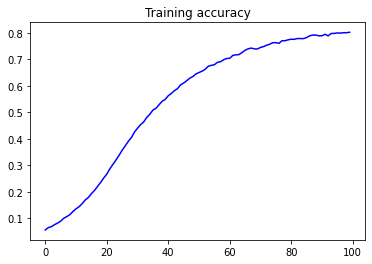

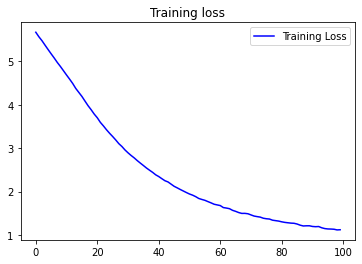

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [0]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope thyself away desired be cross afford twain date of men ' doth groan ' be free free live away away your days here brought of one one more must grow of free ride hits green thee burn pleasure pleasure me of days much brought of pleasure pleasure of pleasure green die burn'd hits dwells beard ward fall by days another rolling ' doth ride ride ride ride ' her view free grew to ride cherish plight grow thus days did tell away away night exchanged mad so meant free his senses can alive pleasure ride ride light decease translate must


In [0]:
"Help me Obi Wan Kenobi, you're my only hope of every pen shows know confounds thine thine eye aside bright than gently cheeks express'd place in mind keep something new hate of die much date cheeks day was me away the rhyme ' may be bevel disdain erred light light stand bright ' write me flowers so look me doth grow ill old old glory still say thee but now come away a gainer his part torn torn away away ill young new date lies be express'd rare rare ill ill near feast so 'will ' hast me well seen live up memory prove keep invention spent kind check"

"Help me Obi Wan Kenobi, you're my only hope of every pen shows know confounds thine thine eye aside bright than gently cheeks express'd place in mind keep something new hate of die much date cheeks day was me away the rhyme ' may be bevel disdain erred light light stand bright ' write me flowers so look me doth grow ill old old glory still say thee but now come away a gainer his part torn torn away away ill young new date lies be express'd rare rare ill ill near feast so 'will ' hast me well seen live up memory prove keep invention spent kind check"